### **Data Cleaning**

In [1]:
# Import libraries again after environment reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Load both datasets
mat_df = pd.read_csv("student-mat.csv", sep=";")
por_df = pd.read_csv("student-por.csv", sep=";")

In [3]:
# Concatenate datasets
df = pd.concat([mat_df, por_df], ignore_index=True)

In [4]:
# Create target column: 1 if G3 >= 10, else 0
df["pass"] = (df["G3"] >= 10).astype(int)

In [5]:
# Drop original grade columns to simulate prediction
df = df.drop(["G1", "G2", "G3"], axis=1)

### **Feature Selection**

In [6]:
# Encode categorical variables
label_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(le.fit_transform)

In [7]:
# Define features and target
X = df.drop("pass", axis=1)
y = df["pass"]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Classification Models**

In [9]:
# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [11]:
accuracy

0.7129186602870813

In [12]:
report


'              precision    recall  f1-score   support\n\n           0       0.50      0.23      0.32        60\n           1       0.75      0.91      0.82       149\n\n    accuracy                           0.71       209\n   macro avg       0.62      0.57      0.57       209\nweighted avg       0.68      0.71      0.67       209\n'

In [13]:
cm

array([[ 14,  46],
       [ 14, 135]])

### **Visualization**

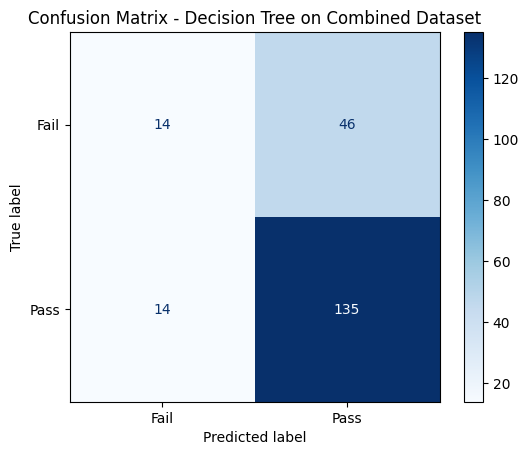

In [14]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree on Combined Dataset")
plt.show()

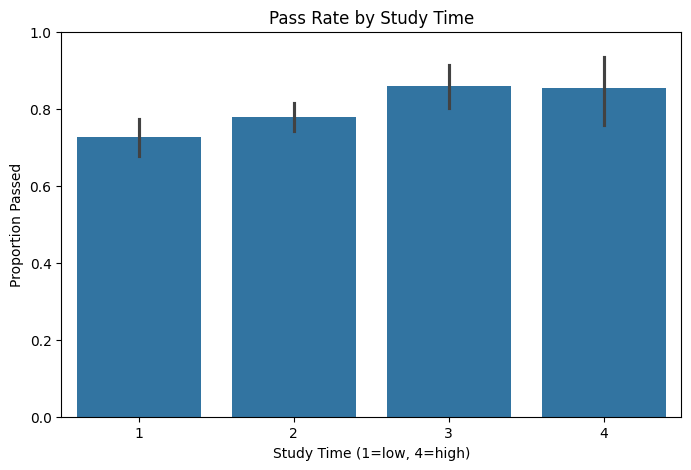

In [15]:
# Plot the Pass Rate by Study Time

plt.figure(figsize=(8, 5))
sns.barplot(x="studytime", y="pass", data=df)
plt.title("Pass Rate by Study Time")
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Proportion Passed")
plt.ylim(0, 1)
plt.show()

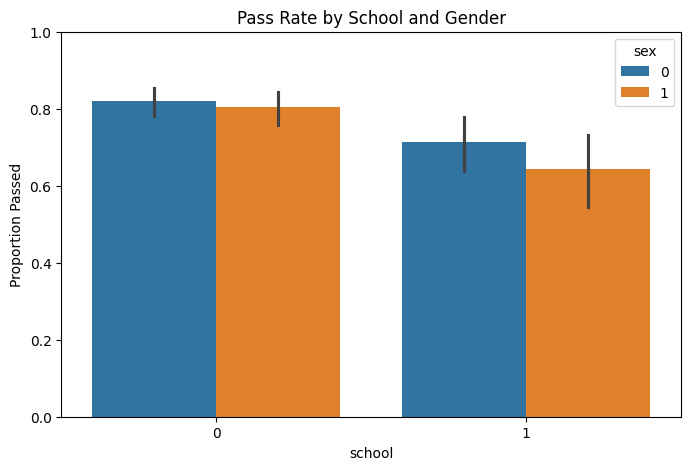

In [16]:
# Plot the Pass Rate by School and Sex

plt.figure(figsize=(8, 5))
sns.barplot(x="school", y="pass", hue="sex", data=df)
plt.title("Pass Rate by School and Gender")
plt.ylabel("Proportion Passed")
plt.ylim(0, 1)
plt.show()

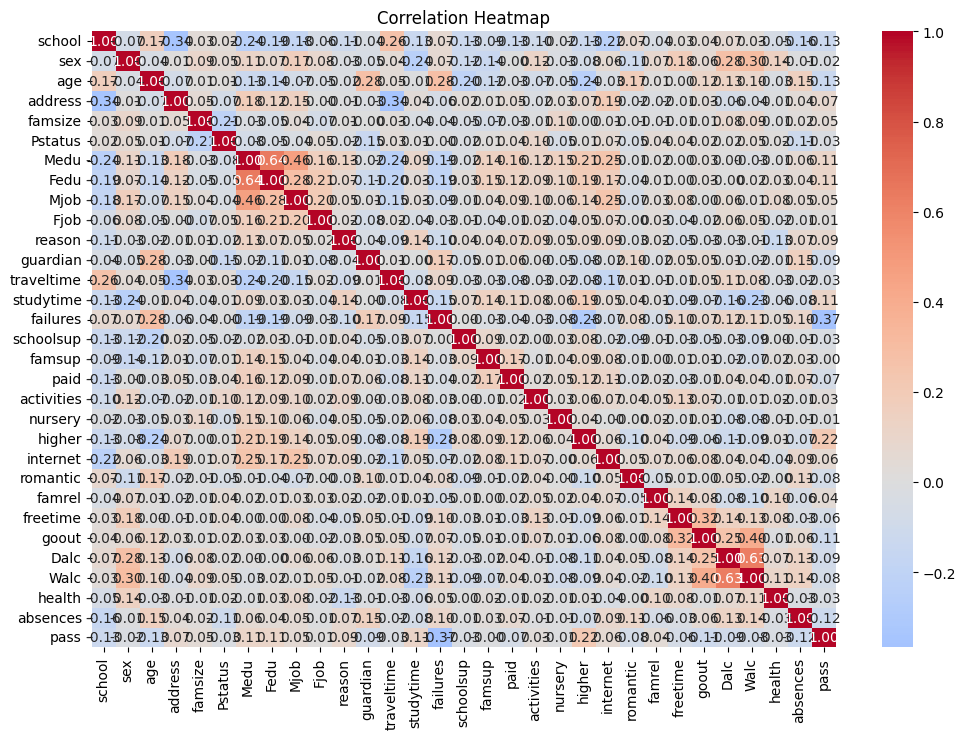

In [17]:
# Plot the Correlation Heatmap for Numeric Features

# Encode categorical variables temporarily
encoded_df = df.copy()
for col in encoded_df.select_dtypes("object").columns:
    encoded_df[col] = encoded_df[col].astype("category").cat.codes

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = encoded_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


#### **Model Performance on Combined Dataset (Math + Portuguese)**
**Accuracy:** 72.2%

**Classification Report:**


            precision    recall  f1-score   support

         0       0.53      0.28      0.37        60
         1       0.76      0.90      0.82       149

  accuracy                           0.72       209
 macro avg       0.64      0.59      0.60       209
